In [43]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_moons

from sklearn.cluster import KMeans

### K value limitation

/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_87387/4002629198.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=None, s=2, cmap='autumn')


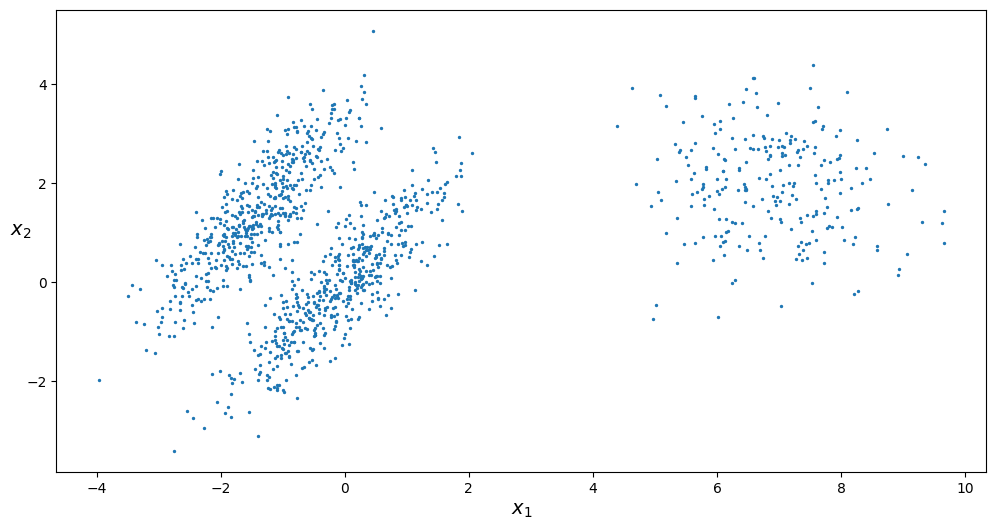

In [35]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=60)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=39)
X2 = X2 + [6, -4]
X = np.r_[X1, X2]
y = np.r_[y1, y2]


plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=None, s=2, cmap='autumn')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

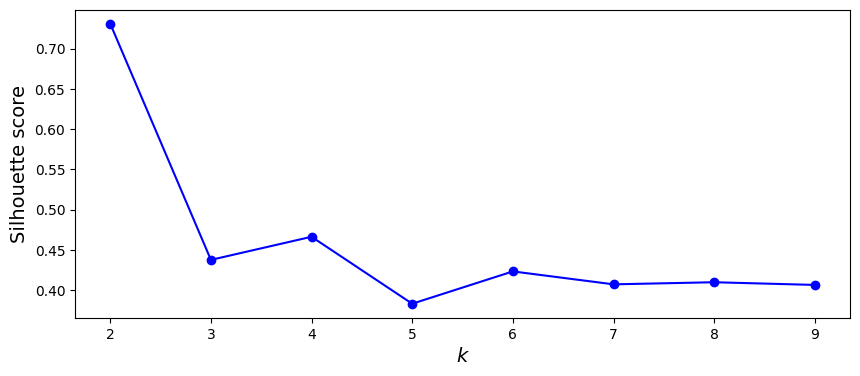

In [36]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]



silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(10, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [37]:
# Number of clusters
k = 3

# Train the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42, verbose=1)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 2716.9354127350202.
Iteration 1, inertia 2267.0033397937996.
Iteration 2, inertia 2250.5140521181365.
Iteration 3, inertia 2239.225100733845.
Iteration 4, inertia 2236.1488776380857.
Iteration 5, inertia 2234.7522251090113.
Iteration 6, inertia 2233.394462428765.
Converged at iteration 6: center shift 0.00042144991152712164 within tolerance 0.000619565259188781.


KMeans(n_clusters=3, random_state=42, verbose=1)

In [38]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=5)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

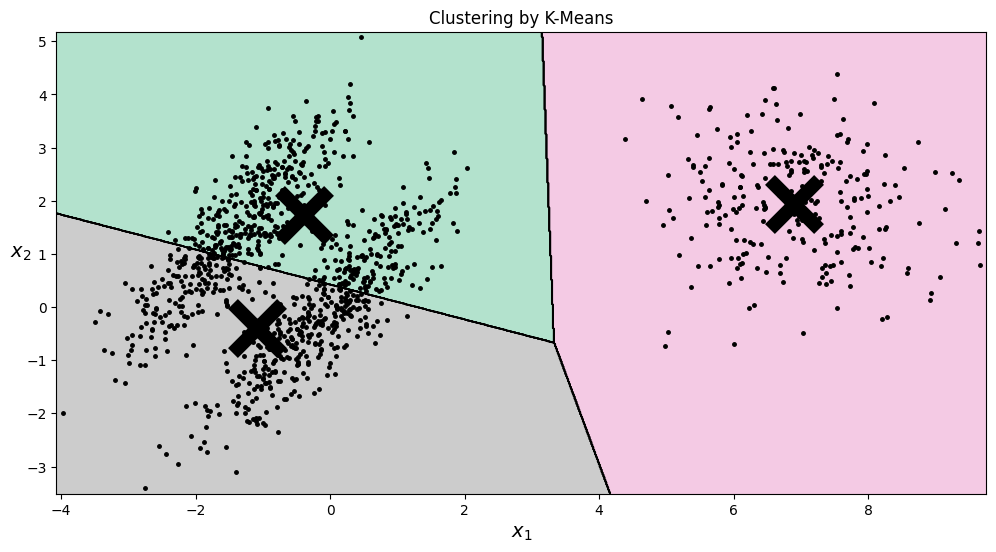

In [39]:
plt.figure(figsize=(12, 6))
plt.title("Clustering by K-Means")
plot_decision_boundaries(kmeans, X)
plt.show()

### Noisy and arbitrary shapes limitations

/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_87387/3748450739.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=None, s=5, cmap='autumn')


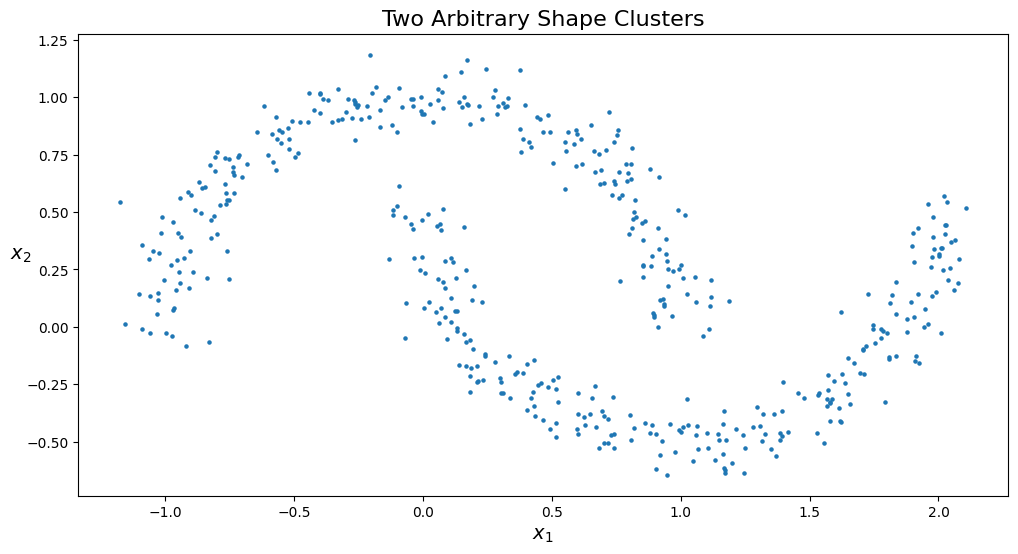

In [53]:
X, y = make_moons(n_samples=500, noise=0.08, random_state=100)


plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=None, s=5, cmap='autumn')
plt.title("Two Arbitrary Shape Clusters", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

In [50]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, verbose=1)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 377.6135220531479.
Iteration 1, inertia 240.59580965793137.
Iteration 2, inertia 216.1836519584272.
Iteration 3, inertia 209.03965247337695.
Iteration 4, inertia 206.87991657149666.
Iteration 5, inertia 206.20557255513285.
Iteration 6, inertia 205.7323466530081.
Iteration 7, inertia 205.6670890277826.
Iteration 8, inertia 205.62117180520445.
Converged at iteration 8: strict convergence.


KMeans(n_clusters=2, random_state=42, verbose=1)

In [51]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=5)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

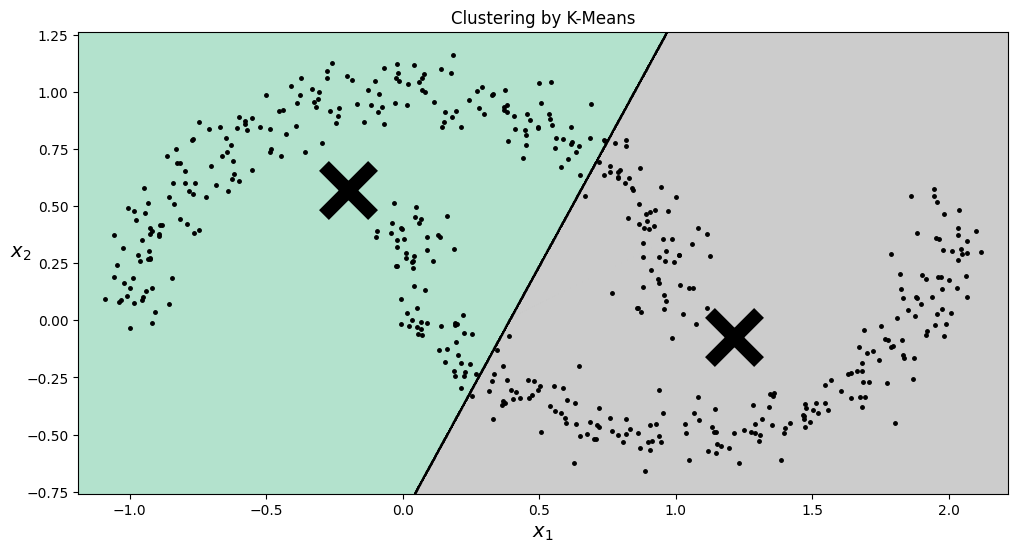

In [52]:
plt.figure(figsize=(12, 6))
plt.title("Clustering by K-Means")
plot_decision_boundaries(kmeans, X)
plt.show()